# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), **collection.kwargs)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], **kwargs):
        self.points = np.array(points)
        self.kwargs = kwargs

class LinesCollection:
    def __init__(self, lines = [], **kwargs):
        self.lines = lines
        self.kwargs = kwargs
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        return mcoll.LineCollection(self.lines, **self.kwargs)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])


### Przykład użycia

<IPython.core.display.Javascript object>


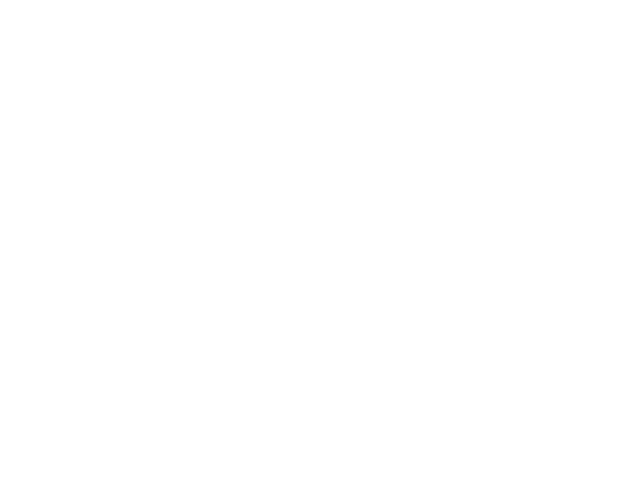

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], color='green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], color='orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], color='red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], color='black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw()

### Rozwiązanie

In [4]:
%matplotlib notebook

#### Generowanie punktów

In [94]:
import random
import math
def genPointsOn2DPlain(a, b, n):
    return [(random.uniform(a, b), random.uniform(a, b)) for _ in range(n)]

def genPointsOnCircle(R, A, n):
    points = []
    for x in range(n):
        p = random.uniform(0,2 * math.pi)
        points.append(((math.sin(p) * R) + A[0],
                       (math.cos(p) * R + A[1])))
    return points

def genPointsOnSquare(A, B, C, D, n):
    points = []
    for x in range(n):
        side = random.randint(1,4)
        if side == 1:  # A-B
            points.append((A[0], random.uniform(A[1], B[1])))
        elif side == 2:  # B-C
            points.append((random.uniform(B[0], C[0]), B[1]))
        elif side == 3:  # C-D
            points.append((C[0], random.uniform(C[1], D[1])))
        else:  # D-A
            points.append((random.uniform(A[0], D[0]), A[1]))
    return points

def getPointsOnSquareAndDiagonal(A, B, C, D, no, np):
    points = []
    for x in range(no):
        points.append((random.uniform(0, B[0]), 0))
        points.append((0, random.uniform(0, D[1])))
    for x in range(np):
        place = random.uniform(0, B[0])
        points.append((place, place))
        place = random.uniform(0, B[0])
        points.append((place, B[0] - place))
    return points

# point_set1 = genPointsOn2DPlain(-100, 100, 10)
# point_set2 = genPointsOnCircle(100, (0, 0), 20)
# point_set3 = genPointsOnSquare((-10, 10), (-10, -10), (10, -10), (10, 10), 20)
# point_set4 = getPointsOnSquareAndDiagonal((0, 0), (10, 0), (10, 10), (0, 10), 15, 10)

<IPython.core.display.Javascript object>


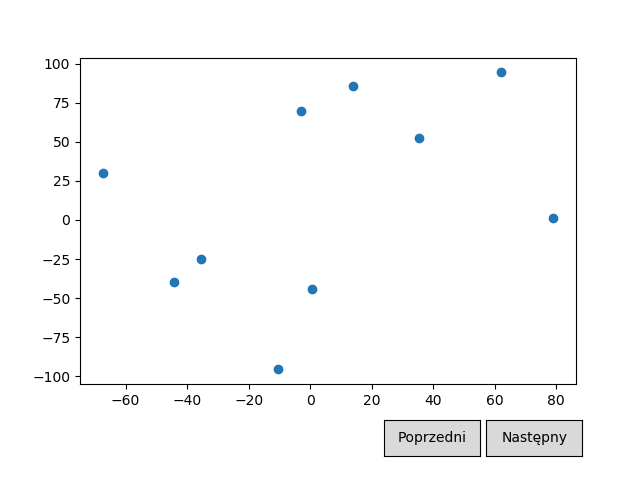

In [15]:
scenes=[Scene([PointsCollection(point_set1)]),
        Scene([PointsCollection(point_set2)]),
        Scene([PointsCollection(point_set3)]),
        Scene([PointsCollection(point_set4)])]
plot = Plot(scenes)
plot.draw()

### Algorytmy 

###### Nachylenie do osi OX 

In [7]:
def slope_to_OX(a, b):
    if a[0] == b[0] and a[1] == b[1]:
        return None
    if a[0] == b[0]:
        return 'X'
    if a[1] == b[1]:
        return 'Y'
    return (a[1] - b[1]) / (a[0] - b[0])

##### Wyznacznik

In [8]:
def determinant(a, b, c):
    return ((a[0] - c[0]) * (b[1] - c[1])) - ((a[1] - c[1]) * (b[0] - c[0]))
# >0 => lewa strona
# <0 => prawa strona
# =0 => na linii

### Graham

In [70]:
def Graham(points):
    
    points.sort(key=lambda x: (x[1], x[0]))
    p0 = points[0]

    share_x_with_p0 = []
    share_y_with_p0 = []
    positive_slope = []
    negative_slope = []

    for point in points:
        slope = (slope_to_OX(p0, point), point)

        if slope[0] is None:
            continue
        elif slope[0] == 'X':
            share_x_with_p0.append(slope)
        elif slope[0] == 'Y':
            share_y_with_p0.append(slope)
        elif slope[0] > 0:
            positive_slope.append(slope)
        else:
            negative_slope.append(slope)

    share_x_with_p0.sort(key=lambda x: x[1][1], reverse=True)
    share_y_with_p0.sort(key=lambda x: x[1][0], reverse=True)
    positive_slope.sort(key=lambda x: (x[0], x[1][0]))
    negative_slope.sort(key=lambda x: (x[0], x[1][0]))

    slopes = []

    if share_y_with_p0 != []:
        slopes.append(share_y_with_p0[0][1])
    tmp = []
    for point in positive_slope:
        if tmp == [] or point[0] == tmp[len(tmp) - 1][0]:
            tmp.append(point)
        else:
            slopes.append(tmp[len(tmp) - 1][1])
            tmp.append(point)
    if tmp != []: slopes.append(tmp[len(tmp) - 1][1])

    if share_x_with_p0 != []: slopes.append(share_x_with_p0[0][1])
    tmp = []
    for point in negative_slope:
        if tmp == [] or point[0] == tmp[len(tmp) - 1][0]:
            tmp.append(point)
        else:
            slopes.append(tmp[len(tmp) - 1][1])
            tmp.append(point)
    if tmp != []: slopes.append(tmp[len(tmp) - 1][1])
    slopes.insert(0, p0)

    i = 3
    stack = []
    stack.append(slopes[0])
    stack.append(slopes[1])
    stack.append(slopes[2])
    
    steps = []
    
    while i < len(slopes):
        
        steps.append(stack.copy())
        
        j = len(stack) - 2

        det = determinant(stack[j], stack[j + 1], slopes[i])
        if det > 0:
            stack.append(slopes[i])
            i += 1
        elif det < 0:
            stack.pop()
        else:
            stack.pop()
            stack.append(slopes[i])
            i += 1
    return stack, steps

##### Najniższy punkt 

In [71]:
def bottom_index(points):
    bottom = 0
    for i in range(1, len(points)):
        if points[i][1] < points[bottom][1]:
            bottom = i
        elif points[i][1] == points[bottom][1]:
            if points[i][0] < points[bottom][0]:
                bottom = i
    return bottom

In [72]:
def distance(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

### Jarvis

In [99]:
def Jarvis(points):
    n = len(points)
    if n < 3:
        return

    p0 = bottom_index(points)
    hull = []

    p = p0
    
    steps = []
    
    while True:
        hull.append(points[p])
        
        steps.append(hull.copy())
        
        q = (p + 1) % n

        for i in range(n):
            if determinant(points[p], points[i], points[q]) > 0:
                q = i
            elif determinant(points[p], points[i], points[q]) == 0:
                if distance(points[p], points[i]) > distance(points[p], points[q]):
                    q = i
                
        p = q
        if p == p0:
            break

    return hull, steps

### Rysowanie

In [77]:
def creating_lines(points, state=None):
    lines = []
    for i in range(len(points)):
        if i > 0:
            lines.append([points[i-1], points[i]])
    if state == 'complete':
        lines.append([points[0], points[len(points) - 1]])
    return lines

##### Graham punkty na płaszczyźnie 

<IPython.core.display.Javascript object>


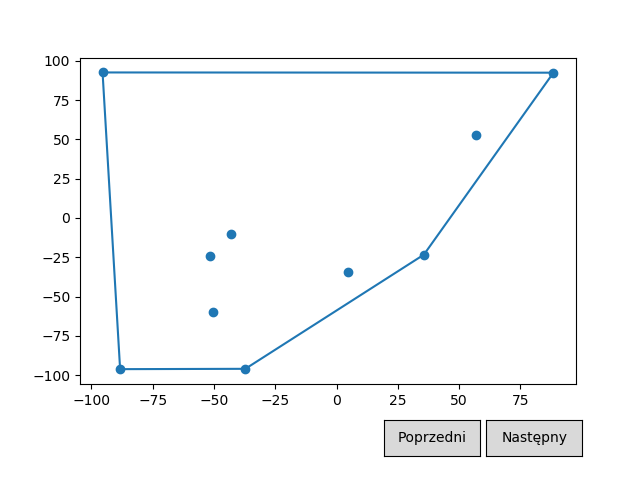

In [93]:
point_set1 = genPointsOn2DPlain(-100, 100, 10)

hull1 = Graham(point_set1)
hull_lines1 = creating_lines(hull1[0], 'complete')
hull_steps1 = hull1[1]
scenes=[Scene([PointsCollection(point_set1)],
              [LinesCollection(hull_lines1)])]

for step in hull_steps1:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set1)],
                        [LinesCollection(step_ani)]))
final_step = creating_lines(hull1[0])
scenes.append(Scene([PointsCollection(point_set1)],
                    [LinesCollection(final_step)]))

plot=Plot(scenes)
plot.draw()

##### Graham punkty na okręgu 

<IPython.core.display.Javascript object>


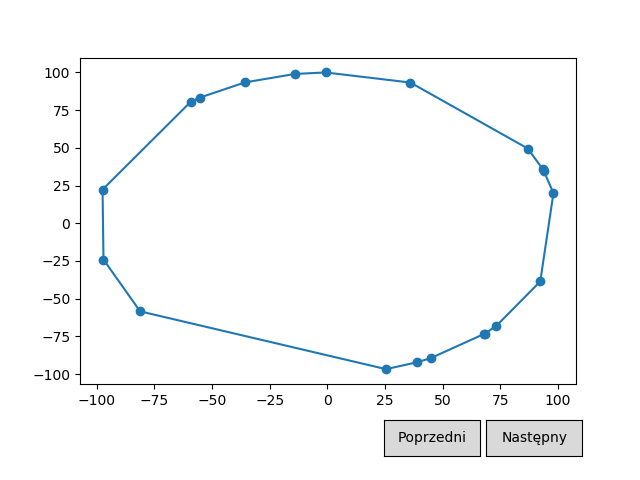

In [89]:
point_set2 = genPointsOnCircle(100, (0, 0), 20)

hull2 = Graham(point_set2)
hull_lines2 = creating_lines(hull2[0], 'complete')
hull_steps2 = hull2[1]
scenes=[Scene([PointsCollection(point_set2)],
              [LinesCollection(hull_lines2)])]

for step in hull_steps2:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set2)],
                        [LinesCollection(step_ani)]))
final_step = creating_lines(hull2[0])
scenes.append(Scene([PointsCollection(point_set2)],
                    [LinesCollection(final_step)]))

plot=Plot(scenes)
plot.draw()

##### Graham punkty na prostokącie 

<IPython.core.display.Javascript object>


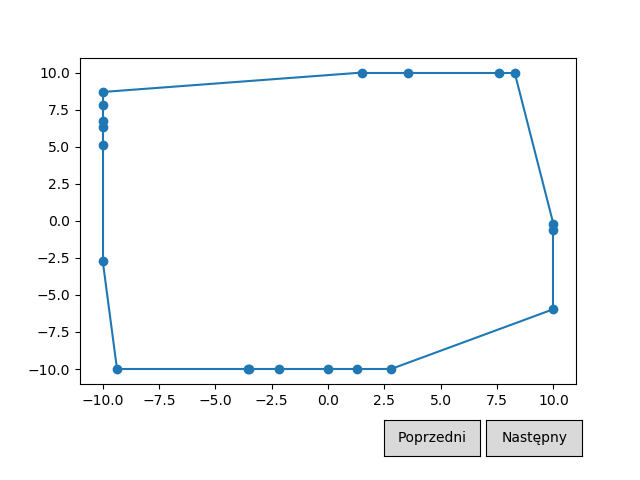

In [107]:
point_set3 = genPointsOnSquare((-10, 10), (-10, -10), (10, -10), (10, 10), 20)

hull3 = Graham(point_set3)
hull_lines3 = creating_lines(hull3[0], 'complete')
hull_steps3 = hull3[1]
scenes=[Scene([PointsCollection(point_set3)],
              [LinesCollection(hull_lines3)])]

for step in hull_steps3:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set3)],
                        [LinesCollection(step_ani)]))
final_step = creating_lines(hull3[0])
scenes.append(Scene([PointsCollection(point_set3)],
                    [LinesCollection(final_step)]))

plot=Plot(scenes)
plot.draw()

##### Graham punkty na prostokącie i przekątnych 

<IPython.core.display.Javascript object>


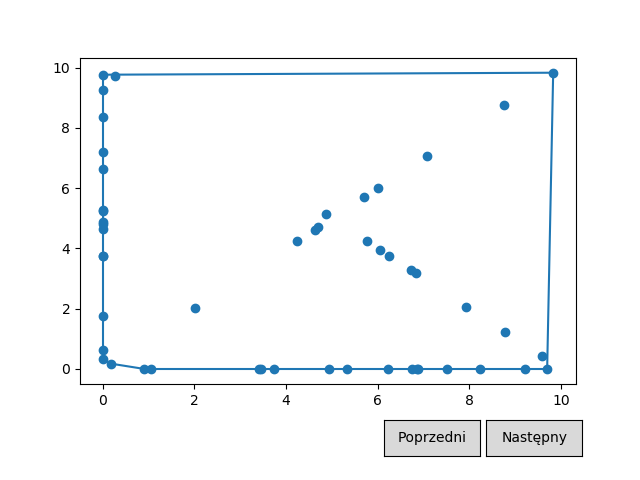

In [97]:
point_set4 = getPointsOnSquareAndDiagonal((0, 0), (10, 0), (10, 10), (0, 10), 15, 10)

hull4 = Graham(point_set4)
hull_lines4 = creating_lines(hull4[0], 'complete')
hull_steps4 = hull4[1]
scenes=[Scene([PointsCollection(point_set4)],
              [LinesCollection(hull_lines4)])]

for step in hull_steps4:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set4)],
                        [LinesCollection(step_ani)]))
final_step = creating_lines(hull4[0])
scenes.append(Scene([PointsCollection(point_set4)],
                    [LinesCollection(final_step)]))

plot=Plot(scenes)
plot.draw()

##### Jarvis punkty na płaszczyźnie

<IPython.core.display.Javascript object>


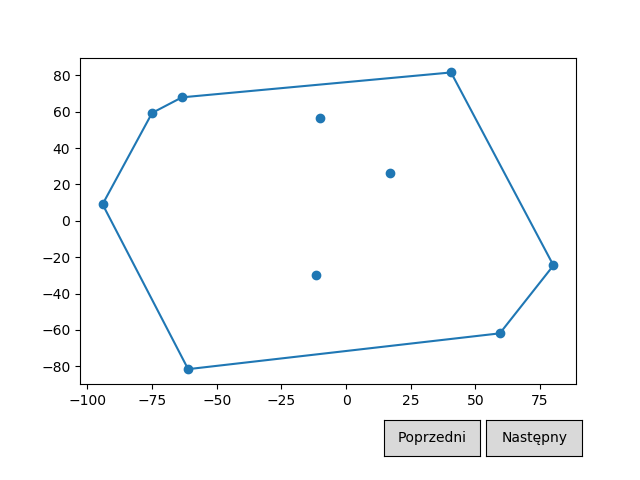

In [103]:
point_set11 = genPointsOn2DPlain(-100, 100, 10)

hull11 = Jarvis(point_set11)
hull_lines11 = creating_lines(hull11[0], 'complete')
hull_steps11 = hull11[1]
scenes=[Scene([PointsCollection(point_set11)],
              [LinesCollection(hull_lines11)])]

for step in hull_steps11:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set11)],
                        [LinesCollection(step_ani)]))

plot=Plot(scenes)
plot.draw()

##### Jarvis punkty na okręgu 

<IPython.core.display.Javascript object>


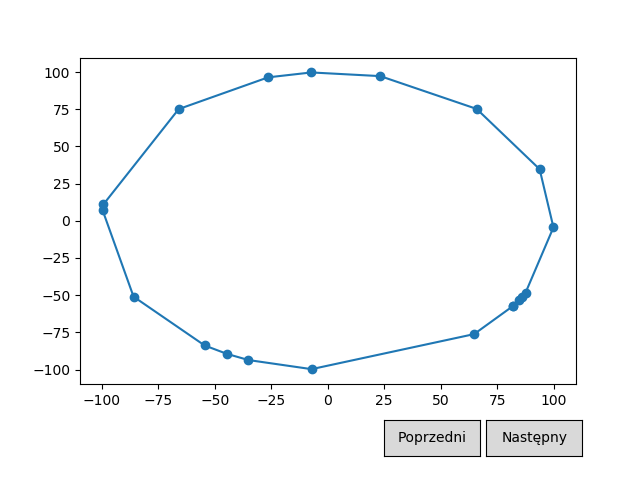

In [104]:
point_set22 = genPointsOnCircle(100, (0, 0), 20)

hull22 = Jarvis(point_set22)
hull_lines22 = creating_lines(hull22[0], 'complete')
hull_steps22 = hull22[1]
scenes=[Scene([PointsCollection(point_set22)],
              [LinesCollection(hull_lines22)])]

for step in hull_steps22:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set22)],
                        [LinesCollection(step_ani)]))

plot=Plot(scenes)
plot.draw()

##### Jarvis punkty na prostokącie 

<IPython.core.display.Javascript object>


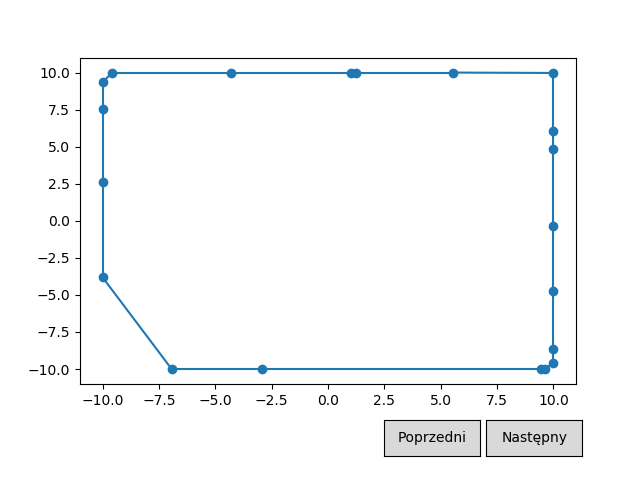

In [105]:
point_set33 = genPointsOnSquare((-10, 10), (-10, -10), (10, -10), (10, 10), 20)

hull33 = Jarvis(point_set33)
hull_lines33 = creating_lines(hull33[0], 'complete')
hull_steps33 = hull33[1]
scenes=[Scene([PointsCollection(point_set33)],
              [LinesCollection(hull_lines33)])]

for step in hull_steps33:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set33)],
                        [LinesCollection(step_ani)]))

plot=Plot(scenes)
plot.draw()

##### Jarvis punkty na prostokącie i przekątnej 

<IPython.core.display.Javascript object>


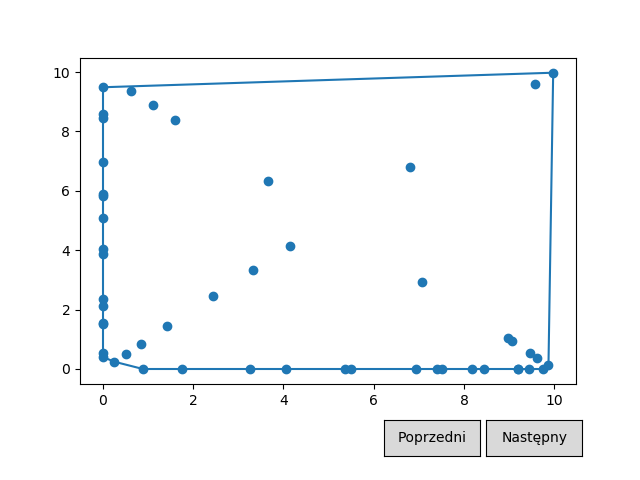

In [106]:
point_set44 = getPointsOnSquareAndDiagonal((0, 0), (10, 0), (10, 10), (0, 10), 15, 10)

hull44 = Jarvis(point_set44)
hull_lines44 = creating_lines(hull44[0], 'complete')
hull_steps44 = hull44[1]
scenes=[Scene([PointsCollection(point_set44)],
              [LinesCollection(hull_lines44)])]

for step in hull_steps44:
    step_ani = creating_lines(step)
    scenes.append(Scene([PointsCollection(point_set44)],
                        [LinesCollection(step_ani)]))

plot=Plot(scenes)
plot.draw()

#### Porównanie czasów

In [110]:
import time

set1 = genPointsOn2DPlain(-1000, 1000, 1000)
set2 = genPointsOnCircle(1000, (0, 0), 1000)
set3 = genPointsOnSquare((-100, 100), (-100, -100), (100, -100), (100, 100), 1000)
set4 = getPointsOnSquareAndDiagonal((0, 0), (100, 0), (100, 100), (0, 100), 500, 1000)

start = time.time()
Graham(set1)
end = time.time()
graham_plaszczyzna = end -start

start = time.time()
Graham(set2)
end = time.time()
graham_okrag = end -start

start = time.time()
Graham(set3)
end = time.time()
graham_prostokat = end -start

start = time.time()
Graham(set4)
end = time.time()
graham_prostokat_przekatne = end -start

start = time.time()
Jarvis(set1)
end = time.time()
jarvis_plaszczyzna = end -start

start = time.time()
Jarvis(set2)
end = time.time()
jarvis_okrag = end -start

start = time.time()
Jarvis(set3)
end = time.time()
jarvis_prostokat = end -start

start = time.time()
Jarvis(set4)
end = time.time()
jarvis_prostokat_przekatne = end -start

print('Graham punkty na płaszczyźnie: ', graham_plaszczyzna)
print('Graham punkty na okręgu      : ', graham_okrag)
print('Graham punkty na prostokącie : ', graham_prostokat)
print('Graham punkty na przekątnych : ', graham_prostokat_przekatne)
print()
print('Jarvis punkty na płaszczyźnie: ', jarvis_plaszczyzna)
print('Jarvis punkty na okręgu      : ', jarvis_okrag)
print('Jarvis punkty na prostokącie : ', jarvis_prostokat)
print('Jarvis punkty na przekątnych : ', jarvis_prostokat_przekatne)

Graham punkty na płaszczyźnie:  0.006997823715209961
Graham punkty na okręgu      :  0.01399087905883789
Graham punkty na prostokącie :  0.003997325897216797
Graham punkty na przekątnych :  0.020291805267333984

Jarvis punkty na płaszczyźnie:  0.024966716766357422
Jarvis punkty na okręgu      :  1.3846101760864258
Jarvis punkty na prostokącie :  0.015011310577392578
Jarvis punkty na przekątnych :  0.039963722229003906
